# Capstone Project 205

In [1]:
import os
import io
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import re
%matplotlib inline


In [3]:
#cp = pd.read_csv('https://data.montgomerycountymd.gov/resource/i26v-w6bd.csv')
cp = pd.read_csv('Commercial_Permits (4).csv')

In [4]:
rp = pd.read_csv( 'Residential_Permit.csv')
rp.head()

C:\Users\abrah\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Permit Number,Status,Street Number,Street Name,Street Suffix,Post-direction,City,State,ZIP code,Added Date,Issue Date,Final Date,Building Area,Declared Valuation,Description,Application Type,Work Type,Use Code,Pre-direction,Location
0,849824,Finaled,22012,BROADWAY,AVE,NaN,CLARKSBURG,MD,20871.0,08/25/2018,10/23/2018,10/08/2019,4894.0,175000.0,Revision 01 - CHANGE HOUSE ELEVATION. THIS O...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,NaN,"22012 BROADWAY AVE\nCLARKSBURG, MD 20871\n(39...."
1,859503,Issued,3500,DUPONT,AVE,NaN,KENSINGTON,MD,20895.0,11/28/2018,10/08/2019,NaN,3473.0,180000.0,Customer Wants To Use ePlans&nbsp;--existing d...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,NaN,"3500 DUPONT AVE\nKENSINGTON, MD 20895\n(39.031..."
2,861649,Issued,5712,RIVER,RD,NaN,BETHESDA,MD,20816.0,12/20/2018,03/27/2019,NaN,5273.0,400000.0,"Customer Wants To Use ePlans,Construct new hom...",BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,NaN,"5712 RIVER RD\nBETHESDA, MD 20816\n(38.970285,..."
3,863379,Finaled,7312,MAPLE,AVE,NaN,TAKOMA PARK,MD,20912.0,01/15/2019,01/22/2019,10/08/2019,392.0,80000.0,New&nbsp;2 story addition on piers built on re...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,NaN,"7312 MAPLE AVE\nTAKOMA PARK, MD 20912\n(38.978..."
4,884895,Finaled,15316,DONNA,DR,NaN,SILVER SPRING,MD,20905.0,08/01/2019,09/09/2019,10/08/2019,175.0,0.0,DECK:&nbsp; 175 SFSHED:&nbsp; 164 SF,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,DECK,NaN,"15316 DONNA DR\nSILVER SPRING, MD 20905\n(39.1..."


In [5]:
cp

,Permit Number,Status,Street Number,Pre-direction,Street Name,Street Suffix,Post-direction,City,State,ZIP code,Added Date,Issue Date,Final Date,Building Area,Declared Valuation,Description,Application Type,Work Type,Use Code,Location
0,891330,Open,5471,NaN,WISCONSIN,AVE,NaN,CHEVY CHASE,MD,20815.0,09/30/2019,NaN,NaN,100.0,30000.0,RESTORE &amp; REPAIR STRUCTURAL BEAM,COMMERCIAL BUILDING,RESTORE AND / OR REPAIR,BUSINESS BUILDING,"5471 WISCONSIN AVE\nCHEVY CHASE, MD 20815\n(38..."
1,891377,Open,312,NaN,BALTUSROL,DR,NaN,GERMANTOWN,MD,20874.0,09/30/2019,NaN,NaN,300.0,25000.0,"Customer Wants To Use ePlans,brick on CMU wall...",COMMERCIAL BUILDING,CONSTRUCT,COMMERCIAL MISCELLANEOUS STRUC,"312 BALTUSROL DR\nGERMANTOWN, MD 20874"
2,788131,Issued,12100,NaN,PLUM ORCHARD,DR,NaN,SILVER SPRING,MD,20904.0,01/31/2017,04/11/2017,NaN,294813.0,73000000.0,Revision 3 - Vertical expansion const. on the ...,COMMERCIAL BUILDING,CONSTRUCT,HOSPITAL,"12100 PLUM ORCHARD DR\nSILVER SPRING, MD 20904..."
3,873775,Issued,18320,NaN,CONTOUR,RD,NaN,MONTGOMERY VILLAGE,MD,20886.0,04/29/2019,06/28/2019,NaN,920.0,79000.0,CHANGE OF USE: Business to RESTAURANT,COMMERCIAL BUILDING,COMMERCIAL CHANGE OF USE,RESTAURANT,"18320 CONTOUR RD\nMONTGOMERY VILLAGE, MD 20886..."
4,863967,Finaled,11545,NaN,ROCKVILLE,PIKE,NaN,ROCKVILLE,MD,20852.0,01/21/2019,05/31/2019,08/16/2019,30960.0,1937700.0,"Revision ,01 - Modify construction details. N...",COMMERCIAL BUILDING,ALTER,BUSINESS BUILDING,"11545 ROCKVILLE PIKE\nROCKVILLE, MD 20852\n(39..."
5,863969,Finaled,11545,NaN,ROCKVILLE,PIKE,NaN,ROCKVILLE,MD,20852.0,01/21/2019,06/17/2019,08/16/2019,2120.0,223100.0,"Customer Wants To Use ePlans,RESTROOM RENOVATI...",COMMERCIAL BUILDING,ALTER,BUSINESS BUILDING,"11545 ROCKVILLE PIKE\nROCKVILLE, MD 20852\n(39..."
6,863927,Finaled,5454,NaN,WISCONSIN,AVE,NaN,CHEVY CHASE,MD,20815.0,01/21/2019,04/15/2019,08/23/2019,1984.0,95700.0,*AO APPLICATION* SUITE 1540--OFFICE RENOVATION...,COMMERCIAL BUILDING,ALTER,BUSINESS BUILDING,"5454 WISCONSIN AVE\nCHEVY CHASE, MD 20815\n(38..."
7,891305,Open,11160,NaN,VEIRS MILL,NaN,NaN,WHEATON,MD,20902.0,09/30/2019,NaN,NaN,1.0,11912.0,"Customer Wants To Use ePlans,Install 1 Solar P...",COMMERCIAL BUILDING,CONSTRUCT,COMMERCIAL MISCELLANEOUS STRUC,"11160 VEIRS MILL\nWHEATON, MD 20902\n(39.03832..."
8,808065,Finaled,13438,NaN,NEW HAMPSHIRE,AVE,NaN,SILVER SPRING,MD,20904.0,07/27/2017,09/06/2017,04/12/2018,1344.0,49000.0,INTERIOR ALTERATION TO EXISTING CARRY OUT /DELI,COMMERCIAL BUILDING,ALTER,BUSINESS BUILDING,"13438 NEW HAMPSHIRE AVE\nSILVER SPRING, MD 209..."
9,578169,Finaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/25/2011,09/14/2011,07/07/2014,10.0,30000.0,adding (3)three antennas to existing transmiss...,COMMERCIAL BUILDING,ADD,COMMERCIAL MISCELLANEOUS STRUC,NaN


In [6]:
cp.tail()

,Permit Number,Status,Street Number,Pre-direction,Street Name,Street Suffix,Post-direction,City,State,ZIP code,Added Date,Issue Date,Final Date,Building Area,Declared Valuation,Description,Application Type,Work Type,Use Code,Location
28801,744532,Finaled,9704,NaN,MEDICAL CENTER,DR,NaN,ROCKVILLE,MD,20850.0,02/12/2016,03/14/2016,03/21/2017,27000.0,1162792.0,Interior Alterations : including systems Furni...,COMMERCIAL BUILDING,ALTER,BUSINESS BUILDING,"9704 MEDICAL CENTER DR\nROCKVILLE, MD 20850\n(..."
28802,745364,Finaled,4800,NaN,HAMPDEN,LN,NaN,BETHESDA,MD,20814.0,02/22/2016,04/29/2016,08/18/2016,11027.0,527683.0,Partial renovation of the 3rd Floor Revision 0...,COMMERCIAL BUILDING,ALTER,BUSINESS BUILDING,"4800 HAMPDEN LN\nBETHESDA, MD 20814\n(38.98271..."
28803,745969,Finaled,4806,NaN,MONTGOMERY,LN,NaN,BETHESDA,MD,20814.0,02/25/2016,03/04/2016,05/24/2016,700.0,8000.0,Restore and repair -Girder Truss,COMMERCIAL BUILDING,RESTORE AND / OR REPAIR,TOWNHOUSE,"4806 MONTGOMERY LN\nBETHESDA, MD 20814\n(38.98..."
28804,744012,Open,12510,NaN,PENNYFIELD LOCK,RD,NaN,POTOMAC,MD,20854.0,02/08/2016,NaN,NaN,1.0,50825.0,2 TIERED 18 FT RETAINING WALL IN COMMON AREA,COMMERCIAL BUILDING,CONSTRUCT,RETAINING WALL,"12510 PENNYFIELD LOCK RD\nPOTOMAC, MD 20854\n(..."
28805,744731,Issued,2219,NaN,BEL PRE,RD,NaN,SILVER SPRING,MD,20906.0,02/16/2016,07/01/2016,NaN,36363.0,4300000.0,"Customer Wants To Use ePlans,Construction of a...",COMMERCIAL BUILDING,CONSTRUCT,COMMERCIAL MISCELLANEOUS STRUC,"2219 BEL PRE RD\nSILVER SPRING, MD 20906\n(39...."


In [7]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28806 entries, 0 to 28805
Data columns (total 20 columns):
Permit Number         28806 non-null int64
Status                28806 non-null object
Street Number         27655 non-null object
Pre-direction         749 non-null object
Street Name           27677 non-null object
Street Suffix         27626 non-null object
Post-direction        63 non-null object
City                  27657 non-null object
State                 27652 non-null object
ZIP code              27611 non-null float64
Added Date            28806 non-null object
Issue Date            27072 non-null object
Final Date            15691 non-null object
Building Area         27133 non-null float64
Declared Valuation    27946 non-null float64
Description           26652 non-null object
Application Type      28806 non-null object
Work Type             28802 non-null object
Use Code              28806 non-null object
Location              27677 non-null object
dtypes: float6

In [8]:
cp['Permit Number'].nunique()

28806

In [9]:
cpr = cp.rename({"Permit Number":"P_num", "Street Number":"St_number", "Pre-direction": "Pre_d", "Street Name":"St_name", "Street Number":"St_num",
                 "Street Suffix":"St_suf", "Post-direction":"Post_d","ZIP code":"Zip", "Added Date":"A_date",
                 "Issue Date":"I_date","Final Date":"F_date", "Building Area":"Building_area", "Building Area":"Building_area", 
                 "Declared Valuation":"Decl_v", "Description":"Desc", "Application Type":"A_type", "Work Type":"W_type", "Use Code":"U_code"}, axis='columns')

In [10]:
#sorting Values by "P_num"
cp1 = cpr.sort_values(["P_num"])
#change index to match P_num
cp2 = cp1.reset_index(drop=True)
cp2.shape

(28806, 20)

In [11]:
#Droping Application type since all are commerical in this set
cp1[(cp1['A_type'] != 'COMMERCIAL BUILDING')]
cp2.drop('A_type', axis=1, inplace=True)


In [12]:
cp1[(cp1['State'] != 'MD') & (cp1.State.notnull())].sum()
cp2.drop('State', axis=1, inplace=True)

In [13]:
#Changind dates to DateTime
cp2.A_date = pd.to_datetime(cp2.A_date)
cp2.I_date = pd.to_datetime(cp2.I_date)
cp2.F_date = pd.to_datetime(cp2.F_date)
type(cp2.F_date[1])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
#changeing Zip from a float to a string
cp2.Zip = cp2.Zip.fillna(-1)
cp2.Zip = cp2.Zip.astype(int)
cp2.Zip = cp2.Zip.astype(str)
cp2.Zip = cp2.Zip.replace('-1', np.nan)
type(cp2.Zip[1])

str

In [15]:
cp2.head()

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Location
0,208677,Finaled,19850,NaN,CENTURY,BLVD,NaN,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-10,42600.0,1000000.0,NaN,CONSTRUCT,MULTI-FAMILY DWELLING,"19850 CENTURY BLVD\nGERMANTOWN, MD 20874\n(39...."
1,208678,Finaled,12901,NaN,PINNACLE,DR,NaN,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-11,42600.0,1000000.0,NaN,CONSTRUCT,MULTI-FAMILY DWELLING,"12901 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
2,208679,Finaled,12903,NaN,PINNACLE,DR,NaN,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-12,42600.0,1000000.0,NaN,CONSTRUCT,MULTI-FAMILY DWELLING,"12903 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
3,208689,Finaled,12907,NaN,PINNACLE,DR,NaN,GERMANTOWN,20874,2000-01-03,2000-12-14,2002-01-31,63300.0,1500000.0,NaN,CONSTRUCT,MULTI-FAMILY DWELLING,"12907 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
4,208690,Finaled,12909,NaN,PINNACLE,DR,NaN,GERMANTOWN,20874,2000-01-03,2000-12-14,2002-01-29,63300.0,1500000.0,NaN,CONSTRUCT,MULTI-FAMILY DWELLING,"12909 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."


In [16]:
cp2.shape

(28806, 18)

Dealing with missing Data

In [17]:
cp2.isnull().values.sum()

83273

In [18]:
#Calculating the percentage of missing data
missing_data = cp2.isnull().sum()
missing_data / len(cp2) * 100

P_num             0.000000
Status            0.000000
St_num            3.995695
Pre_d            97.399847
St_name           3.919322
St_suf            4.096369
Post_d           99.781296
City              3.988752
Zip               4.148441
A_date            0.000000
I_date            6.019579
F_date           45.528709
Building_area     5.807818
Decl_v            2.985489
Desc              7.477609
W_type            0.013886
U_code            0.000000
Location          3.919322
dtype: float64

In [19]:
#Filling in Na's for post and pre directions
cp3 = cp2.copy()
cp2.loc[cp2.Post_d.notnull()]
cp3.Post_d.fillna("N/A", inplace=True)


In [20]:
cp2.loc[cp2.Pre_d.notnull()]
cp3.Pre_d.fillna("N/A",inplace =True)

In [21]:
cp1.Desc.isna().sum()

2154

In [22]:
cp3.Desc.fillna("N/A",inplace =True)

In [23]:
cp3.isnull().values.sum()

24319

Dealing with Finaled date
Seeing that the status and finalled are the same

In [24]:
cp3.F_date.notnull().sum()

15691

In [25]:
cp3.Status.value_counts()


Finaled      15600
Issued       10712
Open          1667
Stop Work      827
Name: Status, dtype: int64

In [26]:
#Decrepancey of 91
cp3.loc[(cp3.Status == 'Stop Work' ) & cp3.F_date.notnull()]
# contains 84 non-null, so still need 7

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Location
10449,495261,Stop Work,6842,N/A,NEW HAMPSHIRE,AVE,N/A,TAKOMA PARK,20912,2008-09-09,2008-11-04,2009-02-09,1300.00,25000.00,Interior Alter\n**REVISION** 1/22/09 Mechancia...,ALTER,RESTAURANT,"6842 NEW HAMPSHIRE AVE\nTAKOMA PARK, MD 20912\..."
11835,526274,Stop Work,9737,N/A,TRAVILLE GATEWAY,DR,N/A,ROCKVILLE,20850,2009-11-24,2009-12-28,2010-04-05,2110.00,12000.00,U&O 265172\nInterior Alterations - constructio...,ALTER,BUSINESS BUILDING,"9737 TRAVILLE GATEWAY DR\nROCKVILLE, MD 20850\..."
14999,591042,Stop Work,10750,N/A,SYMPHONY PARK,DR,N/A,KENSINGTON,20895,2012-02-10,2012-03-15,2012-09-26,3189.00,324959.10,Unit B-Elev. 4,CONSTRUCT,TOWNHOUSE,"10750 SYMPHONY PARK DR\nKENSINGTON, MD 20895\n..."
15045,591647,Stop Work,19300,N/A,GERMANTOWN,RD,N/A,GERMANTOWN,20874,2012-02-21,2012-05-29,2013-05-16,76440.00,3500000.00,Parking Garage,CONSTRUCT,GARAGE,"19300 GERMANTOWN RD\nGERMANTOWN, MD 20874\n(39..."
15368,597326,Stop Work,2337,N/A,FAIRLAND,RD,N/A,SILVER SPRING,20904,2012-04-26,2012-07-24,2013-01-29,522.20,26000.00,Addition for Handicap Lift enclosure & handica...,ADD,PLACE OF WORSHIP,"2337 FAIRLAND RD\nSILVER SPRING, MD 20904\n(39..."
15533,600235,Stop Work,NaN,N/A,NaN,NaN,N/A,NaN,NaN,2012-05-28,2012-07-24,2013-01-04,5116.00,108970.00,Commercial Retaining Walls,CONSTRUCT,RETAINING WALL,NaN
15573,601296,Stop Work,7101,N/A,WISCONSIN,AVE,N/A,BETHESDA,20814,2012-06-07,2012-07-18,2014-02-06,0.00,15000.00,Remove &amp; replace existing (6) antennas wit...,ADD,BUSINESS BUILDING,"7101 WISCONSIN AVE\nBETHESDA, MD 20814\n(38.98..."
15635,602325,Stop Work,12051,N/A,CHESTNUT BRANCH,WAY,N/A,CLARKSBURG,20871,2012-06-18,2012-08-20,2012-11-13,0.00,90000.00,2 RETAINING WALLS FOR SHOPPING CENTER / MAX HE...,CONSTRUCT,RETAINING WALL,"12051 CHESTNUT BRANCH WAY\nCLARKSBURG, MD 2087..."
15735,604228,Stop Work,12800,N/A,MIDDLEBROOK,RD,N/A,GERMANTOWN,20874,2012-07-09,2012-07-18,2013-05-10,10.00,15000.00,REPLACE (6) EXISTING ANTENNAS WITH (6) NEW ANT...,ADD,BUSINESS BUILDING,"12800 MIDDLEBROOK RD\nGERMANTOWN, MD 20874\n(3..."
15901,607324,Stop Work,12630,N/A,VEIRS MILL,RD,N/A,ROCKVILLE,20853,2012-08-02,2012-08-14,2014-02-04,10.00,15000.00,REPLACE 6 EXISTING ANTENNAS / REPLCE 2 EXISITN...,ADD,BUSINESS BUILDING,"12630 VEIRS MILL RD\nROCKVILLE, MD 20853\n(39...."


In [27]:
cp3.loc[(cp3.Status == 'Issued' ) & cp3.F_date.notnull()]
# there we go so 7 which in total accounts for the decrpeancy of 91

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Location
10195,487633,Issued,11601,N/A,LANDSDOWN,ST,N/A,ROCKVILLE,20852,2008-06-13,2010-09-10,2012-06-28,105000.0,7952000.0,Garage under Business Office **Revision submit...,CONSTRUCT,GARAGE,"11601 LANDSDOWN ST\nROCKVILLE, MD 20852\n(39.0..."
11075,510590,Issued,8075,N/A,GEORGIA,AVE,N/A,SILVER SPRING,20910,2009-05-04,2011-04-04,2012-10-01,1872.0,10000.0,N/A,ALTER,MERCANTILE BUILDING,"8075 GEORGIA AVE\nSILVER SPRING, MD 20910\n(38..."
13946,569935,Issued,5510,N/A,NORBECK,RD,N/A,ROCKVILLE,20853,2011-06-01,2011-09-01,2012-09-06,725.0,18000.0,"Interior Alterations, Safeway Store #1668 *Rev...",ALTER,MERCANTILE BUILDING,"5510 NORBECK RD\nROCKVILLE, MD 20853\n(39.0959..."
14019,571859,Issued,4701,N/A,SANGAMORE,RD,N/A,BETHESDA,20816,2011-06-21,2011-09-16,2012-09-18,603.0,25000.0,Revision 07/20/2012 adding consulting room #2,ALTER,MERCANTILE BUILDING,"4701 SANGAMORE RD\nBETHESDA, MD 20816\n(38.950..."
14455,577381,Issued,20211,N/A,GOSHEN,RD,N/A,MONTGOMERY VILLAGE,20886,2011-08-17,2011-09-01,2012-09-05,974.0,18000.0,STORE #1620 *****INTERMEDIATE FAST TRACK*** Re...,ALTER,MERCANTILE BUILDING,"20211 GOSHEN RD\nMONTGOMERY VILLAGE, MD 20886\..."
14762,585077,Issued,10620,N/A,CONNECTICUT,AVE,N/A,KENSINGTON,20895,2011-11-21,2012-02-02,2013-02-04,2400.0,7500.0,Steel Building&nbsp;&nbsp; Extended 08/12/2013,ADD,STORAGE BUILDING,"10620 CONNECTICUT AVE\nKENSINGTON, MD 20895\n(..."
15107,592441,Issued,12210,N/A,CHERRY HILL,RD,N/A,SILVER SPRING,20904,2012-03-01,2012-03-30,2012-10-11,3160.0,120000.0,Auto Dealership 2nd floor Customer Lounge addi...,ADD,BUSINESS BUILDING,"12210 CHERRY HILL RD\nSILVER SPRING, MD 20904\..."


In [28]:
cp3.F_date.fillna("N/A",inplace =True)

In [29]:
 cp3.loc[(cp3.Status == 'Open' ) & cp3.F_date.notnull()]
#all are null

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Location
140,212184,Open,NaN,N/A,NaN,NaN,N/A,NaN,NaN,2000-02-25,NaT,N/A,NaN,44000.0,EXISTING CANOPY RENOVATION ONLY,ALTER,COMMERCIAL MISCELLANEOUS STRUC,NaN
942,237994,Open,79,N/A,DERWOOD,CIR,N/A,ROCKVILLE,20850,2001-01-05,NaT,N/A,NaN,NaN,WHAREHOUSE BUILDING - see BUILDING PERMIT #: 2...,ADD,"STORAGE, MODERATE HAZARD","79 DERWOOD CIR\nROCKVILLE, MD 20850\n(39.10572..."
945,238267,Open,21304,N/A,GOLF ESTATES,DR,N/A,GAITHERSBURG,20882,2001-01-10,NaT,N/A,590.0,4900.0,SALES TRAILER,CONSTRUCT,TRAILER,"21304 GOLF ESTATES DR\nGAITHERSBURG, MD 20882\..."
1470,248941,Open,11338,N/A,KING GEORGE,DR,N/A,SILVER SPRING,20902,2001-05-23,NaT,N/A,NaN,NaN,STRUCTURAL ONLY,ALTER,MULTI-FAMILY DWELLING,"11338 KING GEORGE DR\nSILVER SPRING, MD 20902\..."
1565,250175,Open,12979,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2001-06-06,NaT,N/A,NaN,1.0,ELECTRICAL REVISION ONLY,ALTER,MULTI-FAMILY DWELLING,"12979 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
1566,250176,Open,12981,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2001-06-06,NaT,N/A,NaN,10.0,ELECTRICAL REVISION ONLY,ALTER,MULTI-FAMILY DWELLING,"12981 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
1567,250177,Open,12983,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2001-06-06,NaT,N/A,NaN,1.0,ELECTRICAL REVISION ONLY,ALTER,MULTI-FAMILY DWELLING,"12983 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
1568,250178,Open,12985,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2001-06-06,NaT,N/A,NaN,1.0,ELECTRICAL REVISION ONLY,ALTER,MULTI-FAMILY DWELLING,"12985 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
1569,250179,Open,20001,N/A,CRYSTAL ROCK,DR,N/A,GERMANTOWN,20874,2001-06-06,NaT,N/A,NaN,1.0,ELECTRICAL REVISION ONLY,ALTER,MULTI-FAMILY DWELLING,"20001 CRYSTAL ROCK DR\nGERMANTOWN, MD 20874"
1570,250180,Open,19914,N/A,CRYSTAL ROCK,DR,N/A,GERMANTOWN,20874,2001-06-06,NaT,N/A,NaN,1.0,ELECTRICAL REVISION ONLY,ALTER,MULTI-FAMILY DWELLING,"19914 CRYSTAL ROCK DR\nGERMANTOWN, MD 20874\n(..."


In [30]:
missing_data3 = cp3.isnull().sum()
missing_data3

P_num               0
Status              0
St_num           1151
Pre_d               0
St_name          1129
St_suf           1180
Post_d              0
City             1149
Zip              1195
A_date              0
I_date           1734
F_date              0
Building_area    1673
Decl_v            860
Desc                0
W_type              4
U_code              0
Location         1129
dtype: int64

So before I deal with the rest of the NA's I am going to drop all the faulty location data

In [31]:
Naloc = cp3[cp3.Location.isnull() & cp3.St_num.isnull() & 
            cp3.City.isnull() &  cp3.Zip.isnull()]
Naloc.describe()

,P_num,Building_area,Decl_v
count,1129.000000,1065.000000,1.095000e+03
mean,591168.221435,1644.259096,9.660223e+04
std,184341.270778,10955.918504,9.620402e+05
min,212184.000000,0.000000,0.000000e+00
25%,423791.000000,0.000000,0.000000e+00
50%,546089.000000,0.002000,5.000000e+03
75%,772342.000000,500.000000,3.000000e+04
max,894598.000000,261360.000000,2.500000e+07


In [38]:
D2 = cp3.copy()
D2.dropna(subset=[ 'Location', 'Zip', 'City', 'St_num', 'St_name' ], inplace=True)
D2.shape

(27586, 18)

AttributeError: 'DataFrame' object has no attribute 'type'

In [50]:
missing_data4 = D2.isnull().sum()
missing_data4

P_num               0
Status              0
St_num              0
Pre_d               0
St_name             0
St_suf             48
Post_d              0
City                0
Zip                 0
A_date              0
I_date           1530
F_date              0
Building_area       0
Decl_v              0
Desc                0
W_type              0
U_code              0
Location            0
dtype: int64

Dealing with the remaining Values 

In [41]:
#Declared Value
D2.Decl_v.value_counts
D2.Decl_v = D2.Decl_v.fillna(-1)

In [42]:
D2.Building_area.value_counts()
D2.Building_area = D2.Building_area.fillna(-1)

In [43]:
# manage with editing
D2.loc[(D2.St_suf.isnull())]


,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Location
8480,446385,Open,7500,N/A,WOODMONT,NaN,N/A,BETHESDA,20814,2007-03-01,NaT,N/A,-1.000,-1.0,Code Modification Only IBC: Remove the dividi...,ALTER,MULTI-FAMILY DWELLING,"7500 WOODMONT\nBETHESDA, MD 20814\n(38.984252,..."
9825,479721,Finaled,12500,N/A,PARK POTOMAC,NaN,N/A,POTOMAC,20854,2008-03-11,2008-09-19,2009-05-13 00:00:00,480.000,200000.0,Entrance to Condos and Canopy Replacement,ADD,MULTI-FAMILY DWELLING,"12500 PARK POTOMAC\nPOTOMAC, MD 20854\n(39.060..."
10775,503908,Issued,12500,N/A,PARK POTOMAC,NaN,N/A,POTOMAC,20854,2009-01-22,2009-03-09,N/A,480.000,15000.0,To provide conduit and electrical panels for 3...,ALTER,MERCANTILE BUILDING,"12500 PARK POTOMAC\nPOTOMAC, MD 20854\n(39.060..."
11445,518289,Issued,12500,N/A,PARK POTOMAC,NaN,N/A,POTOMAC,20854,2009-08-06,2009-08-20,N/A,40.000,1800.0,Unit #907 N\nCoversion of existing bedroom and...,ALTER,MULTI-FAMILY DWELLING,"12500 PARK POTOMAC\nPOTOMAC, MD 20854\n(39.060..."
11626,522605,Issued,21040,N/A,HENDERSON CORNER,NaN,N/A,GERMANTOWN,20876,2009-10-02,2010-08-09,N/A,6622.000,750000.0,Construct new 7-Eleven convenience store with ...,CONSTRUCT,MERCANTILE BUILDING,"21040 HENDERSON CORNER\nGERMANTOWN, MD 20876"
12038,529231,Finaled,14201,N/A,GEORGIA AVE,NaN,N/A,SILVER SPRING,20906,2010-01-13,2010-04-26,2010-07-19 00:00:00,3500.000,15000.0,FIRE REPAIR BACK TO ORIGINAL CONDITION ONLY - ...,RESTORE AND / OR REPAIR,MULTI-FAMILY DWELLING,"14201 GEORGIA AVE\nSILVER SPRING, MD 20906\n(3..."
12389,536136,Finaled,14201,N/A,GEORGIA AVE,NaN,N/A,SILVER SPRING,20906,2010-04-26,2010-05-20,2010-12-02 00:00:00,12305.000,150000.0,FIRE REPAIR BACK TO ORIGINAL CONDITION ONLY - ...,RESTORE AND / OR REPAIR,MULTI-FAMILY DWELLING,"14201 GEORGIA AVE\nSILVER SPRING, MD 20906\n(3..."
12394,536331,Issued,21040,N/A,HENDERSON CORNER,NaN,N/A,GERMANTOWN,20876,2010-04-27,2010-08-03,N/A,50.000,3000.0,monument sign,ADD,COMMERCIAL MISCELLANEOUS STRUC,"21040 HENDERSON CORNER\nGERMANTOWN, MD 20876"
12476,537804,Finaled,7500,N/A,WOODMONT,NaN,N/A,BETHESDA,20814,2010-05-13,2010-06-02,2010-06-18 00:00:00,81.000,-1.0,removing fireplace in 3 units,ALTER,MULTI-FAMILY DWELLING,"7500 WOODMONT\nBETHESDA, MD 20814\n(38.984252,..."
12971,549782,Issued,21040,N/A,HENDERSON CORNER,NaN,N/A,GERMANTOWN,20876,2010-09-22,2010-10-05,N/A,2000.000,26000.0,Construct Retaining Wall\n**Intermediate Track...,CONSTRUCT,RETAINING WALL,"21040 HENDERSON CORNER\nGERMANTOWN, MD 20876"


In [44]:
D2.dropna(subset=[ 'W_type'], inplace=True)

In [45]:
print("Old data frame length:", len(cp), "\nNew data frame length:",  
       len(D2), "\nNumber of rows with at least 1 NA value: ", 
       (len(cp)-len(D2))) 

Old data frame length: 28806 
New data frame length: 27583 
Number of rows with at least 1 NA value:  1223


In [46]:
cp1["Null Column"]= None
print(cp1.columns.values, "\n", cp1.columns.values)

['P_num' 'Status' 'St_num' 'Pre_d' 'St_name' 'St_suf' 'Post_d' 'City'
 'State' 'Zip' 'A_date' 'I_date' 'F_date' 'Building_area' 'Decl_v' 'Desc'
 'A_type' 'W_type' 'U_code' 'Location' 'Null Column'] 
 ['P_num' 'Status' 'St_num' 'Pre_d' 'St_name' 'St_suf' 'Post_d' 'City'
 'State' 'Zip' 'A_date' 'I_date' 'F_date' 'Building_area' 'Decl_v' 'Desc'
 'A_type' 'W_type' 'U_code' 'Location' 'Null Column']


In counclusion much has already been done to remove the 1600 rows with missing data.
Now to filter and see how many of the same type

In [47]:
#filtering by year slices
Y_2000 = D2[(D2['A_date'] > '01/01/2000') & (D2['A_date'] < '01/01/2001')]
Y_2001 = D2[(D2['A_date'] > '01/01/2001') & (D2['A_date'] < '01/01/2002')]
Y_2002 = D2[(D2['A_date'] > '01/01/2002') & (D2['A_date'] < '01/01/2003')]
Y_2003 = D2[(D2['A_date'] > '01/01/2003') & (D2['A_date'] < '01/01/2004')]
Y_2004 = D2[(D2['A_date'] > '01/01/2004') & (D2['A_date'] < '01/01/2005')]
Y_2005 = D2[(D2['A_date'] > '01/01/2005') & (D2['A_date'] < '01/01/2006')]
Y_2006 = D2[(D2['A_date'] > '01/01/2006') & (D2['A_date'] < '01/01/2007')]
Y_2007 = D2[(D2['A_date'] > '01/01/2007') & (D2['A_date'] < '01/01/2008')]
Y_2008 = D2[(D2['A_date'] > '01/01/2008') & (D2['A_date'] < '01/01/2009')]
Y_2009 = D2[(D2['A_date'] > '01/01/2009') & (D2['A_date'] < '01/01/2010')]
Y_2010 = D2[(D2['A_date'] > '01/01/2010') & (D2['A_date'] < '01/01/2011')]
Y_2011 = D2[(D2['A_date'] > '01/01/2011') & (D2['A_date'] < '01/01/2012')]
Y_2012 = D2[(D2['A_date'] > '01/01/2012') & (D2['A_date'] < '01/01/2013')]
Y_2013 = D2[(D2['A_date'] > '01/01/2013') & (D2['A_date'] < '01/01/2014')]
Y_2014 = D2[(D2['A_date'] > '01/01/2014') & (D2['A_date'] < '01/01/2015')]
Y_2015 = D2[(D2['A_date'] > '01/01/2015') & (D2['A_date'] < '01/01/2016')]
Y_2016 = D2[(D2['A_date'] > '01/01/2016') & (D2['A_date'] < '01/01/2017')]
Y_2017 = D2[(D2['A_date'] > '01/01/2017') & (D2['A_date'] < '01/01/2018')]
Y_2018 = D2[(D2['A_date'] > '01/01/2018') & (D2['A_date'] < '01/01/2019')]
Y_2019 = D2[(D2['A_date'] > '01/01/2019') & (D2['A_date'] < '01/01/2020')]


In [51]:
#going through zip
D2.Zip.value_counts()
#need to edit 0 and 1 replace with address

20910    2402
20814    2343
20871    1916
20874    1905
20852    1868
20817    1715
20902    1417
20850    1314
20815    1229
20904    1198
20854    1072
20906    1032
20876     901
20855     662
20912     564
20832     547
20895     524
20879     523
20901     482
20816     448
20877     399
20886     388
20841     343
20872     321
20866     301
20878     293
20903     213
20905     210
20853     198
20882     144
20837     137
20860     132
20842     125
20833      85
20851      73
20818      37
20861      36
20847      20
20868      18
20839      16
21771      15
20896       9
20812       8
20892       8
20777       4
0           3
20705       3
20915       3
20880       2
11111       2
Name: Zip, dtype: int64

In [51]:
D2.City.value_counts()

SILVER SPRING         6911
BETHESDA              4466
ROCKVILLE             4134
GERMANTOWN            2796
CLARKSBURG            1930
GAITHERSBURG          1343
CHEVY CHASE           1236
POTOMAC               1040
OLNEY                  550
KENSINGTON             534
TAKOMA PARK            532
MONTGOMERY VILLAGE     365
BOYDS                  342
DAMASCUS               312
BURTONSVILLE           297
POOLESVILLE            137
SANDY SPRING           130
DICKERSON              122
BROOKEVILLE             87
WHEATON                 73
NORTH BETHESDA          41
CABIN JOHN              37
ASHTON                  35
DERWOOD                 25
SPENCERVILLE            18
DARNESTOWN              18
BEALLSVILLE             17
MOUNT AIRY              15
GARRETT PARK             9
LAYTONSVILLE             8
GLEN ECHO                8
HIGHLAND                 4
NORTH POTOMAC            3
WASHINGTON GROVE         2
BELTSVILLE               2
ASPEN HILL               2
DAWSONVILLE              1
B

In [48]:
D2.City.replace(['SILVERSPRING'], ['SILVER SPRING'], inplace=True)


In [49]:
#Makesome sort of range
D2.Decl_v.value_counts()

 25000.00       858
 20000.00       831
 10000.00       825
-1.00           817
 15000.00       781
 50000.00       729
 100000.00      681
 30000.00       588
 200000.00      549
 5000.00        514
 150000.00      491
 80000.00       476
 1.00           418
 60000.00       385
 40000.00       384
 250000.00      318
 300000.00      295
 125000.00      286
 48000.00       281
 75000.00       278
 35000.00       249
 120000.00      221
 45000.00       209
 12000.00       190
 2000.00        182
 500000.00      174
 400000.00      169
 6000.00        161
 3000.00        158
 175000.00      153
               ... 
 117250.00        1
 88600.00         1
 2966223.00       1
 45485.00         1
 58050.00         1
 708772.00        1
 50441.00         1
 21280.00         1
 30517.00         1
 62725.00         1
 85871.20         1
 105974.00        1
 8334009.11       1
 4088396.00       1
 57828.00         1
 10303.00         1
 8512.00          1
 121343.75        1
 839665.00        1


In [49]:
D2.W_type.value_counts()

ALTER                         14915
CONSTRUCT                      7605
ADD                            2484
RESTORE AND / OR REPAIR        1451
COMMERCIAL CHANGE OF USE        666
BUILD FOUNDATION                192
CONSTRUCT SHEETING/SHORING      124
INSTALL                          73
REMOVE AND REPLACE               47
REPLACE                          13
FINAL ONLY AP                     7
OCCUPY                            3
DEMOLISH                          3
Name: W_type, dtype: int64

In [50]:
D2.U_code.value_counts()

BUSINESS BUILDING                   6915
MULTI-FAMILY DWELLING               4569
COMMERCIAL MISCELLANEOUS STRUC      2824
MERCANTILE BUILDING                 2253
TOWNHOUSE                           1688
RESTAURANT                          1541
EDUCATIONAL BUILDING                1439
ASSEMBLY BUILDING                   1057
STORAGE BUILDING                     609
MULTIFAMILY DWELLING LOW RISE        577
RETAINING WALL                       452
PLACE OF WORSHIP                     443
MISCELLANEOUS STRUCTURE              335
HOSPITAL                             304
TRAILER                              282
GARAGE                               248
MULTIFAMILY DWELLING HIGH RISE       246
BANK                                 240
MULTI-FAMILY SENIOR CITIZEN BL       170
INDUSTRIAL BUILDING                  166
BIOSCIENCE                           154
INSTITUTIONAL BUILDING               137
HOTEL                                123
SWIMMING POOL                        119
TOWER           

In [51]:
D2[D2.Desc.str.contains("dont")]
#group thing by going throught thier discrip

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Location
8362,442619,Issued,7326,N/A,CARROLL,AVE,N/A,TAKOMA PARK,20912,2007-01-10,2007-02-22,N/A,3853.0,165000.0,Yoga Studio-Interior demolition work/removal o...,ALTER,BUSINESS BUILDING,"7326 CARROLL AVE\nTAKOMA PARK, MD 20912\n(38.9..."
27901,878101,Issued,9701,N/A,NEW CHURCH,ST,N/A,DAMASCUS,20872,2019-06-05,2019-08-06,N/A,1360.0,0.0,"Customer Wants To Use ePlans, SUITE C Applicat...",COMMERCIAL CHANGE OF USE,BUSINESS BUILDING,"9701 NEW CHURCH ST\nDAMASCUS, MD 20872\n(39.28..."


In [52]:
type(cp2.Location[1])
type(cp2.St_num[1])

str

In [53]:
#D2['Address'] = D2['St_num'].str.cat(D2['St_suf'],sep=" ")
#D2
D2.to_csv('D2.csv')

# Visulazations

In [114]:
street_map = gpd.read_file('tl_2018_24031_roads')

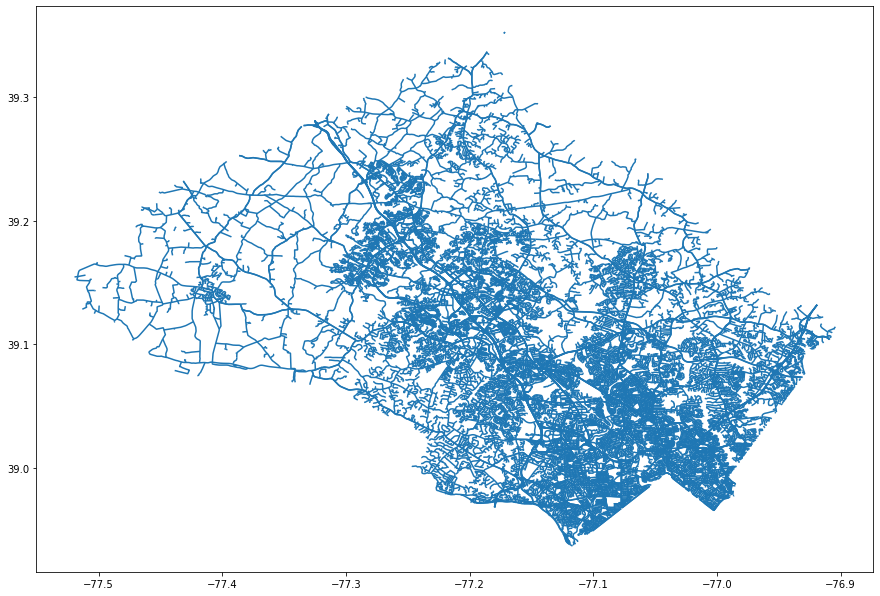

In [115]:
fig,ax = plt.subplots(figsize = (15, 15))
street_map.plot(ax = ax)

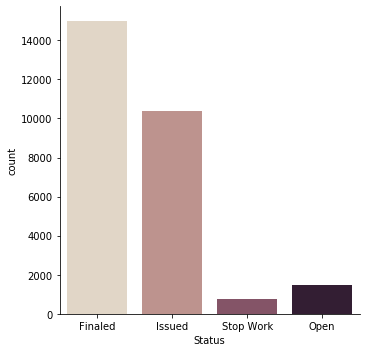

In [54]:
sns.catplot(x="Status", kind="count", palette="ch:.25", data=D2);

In [128]:
D2.City.plot(kind='pie', subplots=True, figsize=(8, 8))


TypeError: '<' not supported between instances of 'str' and 'int'

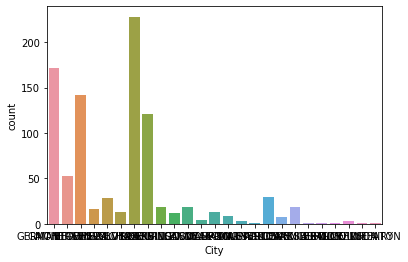

In [57]:
sns.countplot(Y_2000['City'])

In [136]:
plt.figure(figsize=(14,6))

Work = D2.W_type.value_counts()

g = sns.countplot(x='Work', 
                  data=D2[D2.W_type.isin(Work.index.values)],
                 color='darkgreen')
g.set_title("Country Of Wine Origin Count", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

ValueError: Could not interpret input 'Work'

<Figure size 1008x432 with 0 Axes>

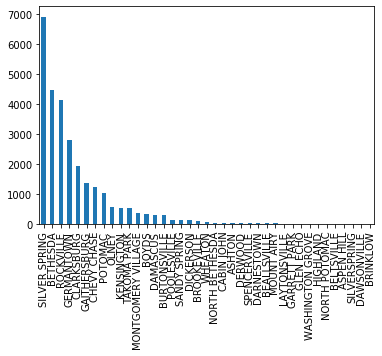

In [137]:
D2['City'].value_counts().plot.bar()

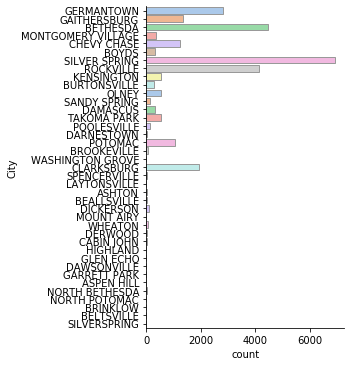

In [133]:
sns.catplot(y="City",  kind="count",
            palette="pastel", edgecolor=".6",
            data=D2);